# Laboratory 2.4: Linear Regression contd.

In this practice you will extend your Linear Regression code to a more general case. Here you will need the `synthetic_dataset.csv` present in the .zip file you downloaded alongside this notebook.

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)
    
### **All the things you need to do are marked by a "TODO" comment nearby. Make sure you *read carefully everything before working* and solve each point before submitting your solution.**

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

### Custom Linear Regression model

You are going to be working with the following class that you already know from the previous practice, so feel free to recycle as much code as you want (or can). In this case, you will be enhancing its functionalities, getting a more general function than the one you implemented before. 

**For now, just continue with the practice and do not fill anything, you will come back later to fill the gaps.**

In [200]:

from src.Lab_2_4_LR2 import LinearRegressor


**Data**: Remember, from the previous lab session, we had the following univariate dataset:

In [201]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

Use the code *you wrote* from the previous practice (not the sklearn version) to fit the data in the following cell

In [202]:
linreg = LinearRegressor()
linreg.fit(x, y)

Before we get into the things you'll do today, let's construct a function that provides the values for the $R^2$, RMSE and MAE. For this, the inputs of this function are the true $y$ values and the predicted $\hat{y}$ values

In [203]:
from src.Lab_2_4_LR2 import evaluate_regression

In [204]:
# Obtain regression performance metrics
y_pred = linreg.predict(x)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9201359388275275, 'RMSE': 1.0126472956832235, 'MAE': 0.8945454545454552}


## Polynomial regression

In the previous practice, you have trained a model assuming that the relationship between input and output is linear. However, in most real cases this is not common and the relationship between input and output is not linear. In this section, we are going to learn how to deal with non-linear relationships when using linear models. Read `synthetic_dataset.csv` and train a linear regression model. 

*The target variable is the last column of the dataset*

In [205]:
data = pd.read_csv("../data/synthetic_dataset.csv")

# TODO: Obtain inputs and output from data
X = np.array(data.loc[:,["Input1","Input2","Input3","Input4"]])
y = np.array(data.loc[:,"Output"])




In this case we will skip the preprocessing and go straight to the modelling phase. Therefore, fit the model here.

In [206]:
# : Train linear regression model
model = LinearRegressor()
model.fit(X,y)


In [207]:
# TODO: Obtain and print the regression performance metrics
y_pred = model.predict(X)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.5452814241832913, 'RMSE': 3.1936452748702813, 'MAE': 2.2373945210247848}


If you trained the model well, the $R^2$ metric will be terrible, in the order of $0.5$. **What happened here?** Let's try to clear this via the *study of the residuals*.

Create a function to plot the residuals of the model. This function shall:
- Create a **histogram** of the residuals.
- Create a **Q-Q plot** of the residuals.
- Create a **scatterplot of the residuals against each input variable, the true output variable and the predictions**.

**Why do we want to check the residuals this way?** 

> We revise the residuals this way to see if they distribute like a normal distribution. If they don't, that could mean that the residue is not homoscedastic, implying that a linear regression model is not optimal to fit the data.

In [208]:
def plot_residuals(data, output_column, prediction_column):
    """
    Plot residuals of a model against all variables in the DataFrame, using box plots for
    categorical variables and scatter plots for continuous variables. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
    """
    #: Calculate residuals
    residuals = data[output_column] - data[prediction_column] 
    
    num_features = len(data.columns) - 2  # Exclude output and prediction columns

    # Determine the number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_features + 4)))  # Add 4 for histogram, Q-Q plot, true output vs residuals, and predictions vs residuals
    num_cols = int(np.ceil((num_features + 4) / num_rows))

    # Plot histogram of residuals
    plt.figure(figsize=(5 * num_cols, 4 * num_rows))
    plt.subplot(num_rows, num_cols, 1)
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    #: Plot Q-Q plot of residuals (tip: use stats.probplot from scipy)
    plt.subplot(num_rows, num_cols, 2)
    stats.probplot(residuals, dist="norm", plot=plt)       # Fill the code here
    plt.title('Q-Q Plot of Residuals')

    # : Plot residuals against output variable
    plt.subplot(num_rows, num_cols, 3)
    plt.scatter(data[output_column],residuals, alpha=0.5)     # Fill the code here
    plt.title('Residuals vs True Output')
    plt.xlabel('True Output')
    plt.ylabel('Residuals')

    # Plot residuals against prediction variable
    plt.subplot(num_rows, num_cols, 4)
    plt.scatter(data[prediction_column], residuals, alpha=0.5)   # Use this as example for later
    plt.title('Residuals vs Predictions')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')

    # TODO: Plot residuals against each input variable
    for i, col in enumerate(data.columns):
        if col not in [output_column, prediction_column]:
            plt.subplot(num_rows, num_cols, i + 5)
            if data[col].dtype == 'object':  
                plt.boxplot([residuals[data[col] == category] for category in np.unique(data[col])])
                plt.xticks(range(1, len(np.unique(data[col])) + 1), np.unique(data[col]), rotation=45)
            else:  
                plt.scatter(data[col], residuals, alpha=0.5)
            plt.title(f'Residuals vs {col}')
            plt.xlabel(col)
            plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

Now, **print the coefficients** of the model **alongside the plots** you can generate with the previous function

Coefficients of the model: {'Input1': -0.001911809835741518, 'Input2': -0.0059802946618376755, 'Input3': 1.630324001991257, 'Input4': 3.059308730603962}


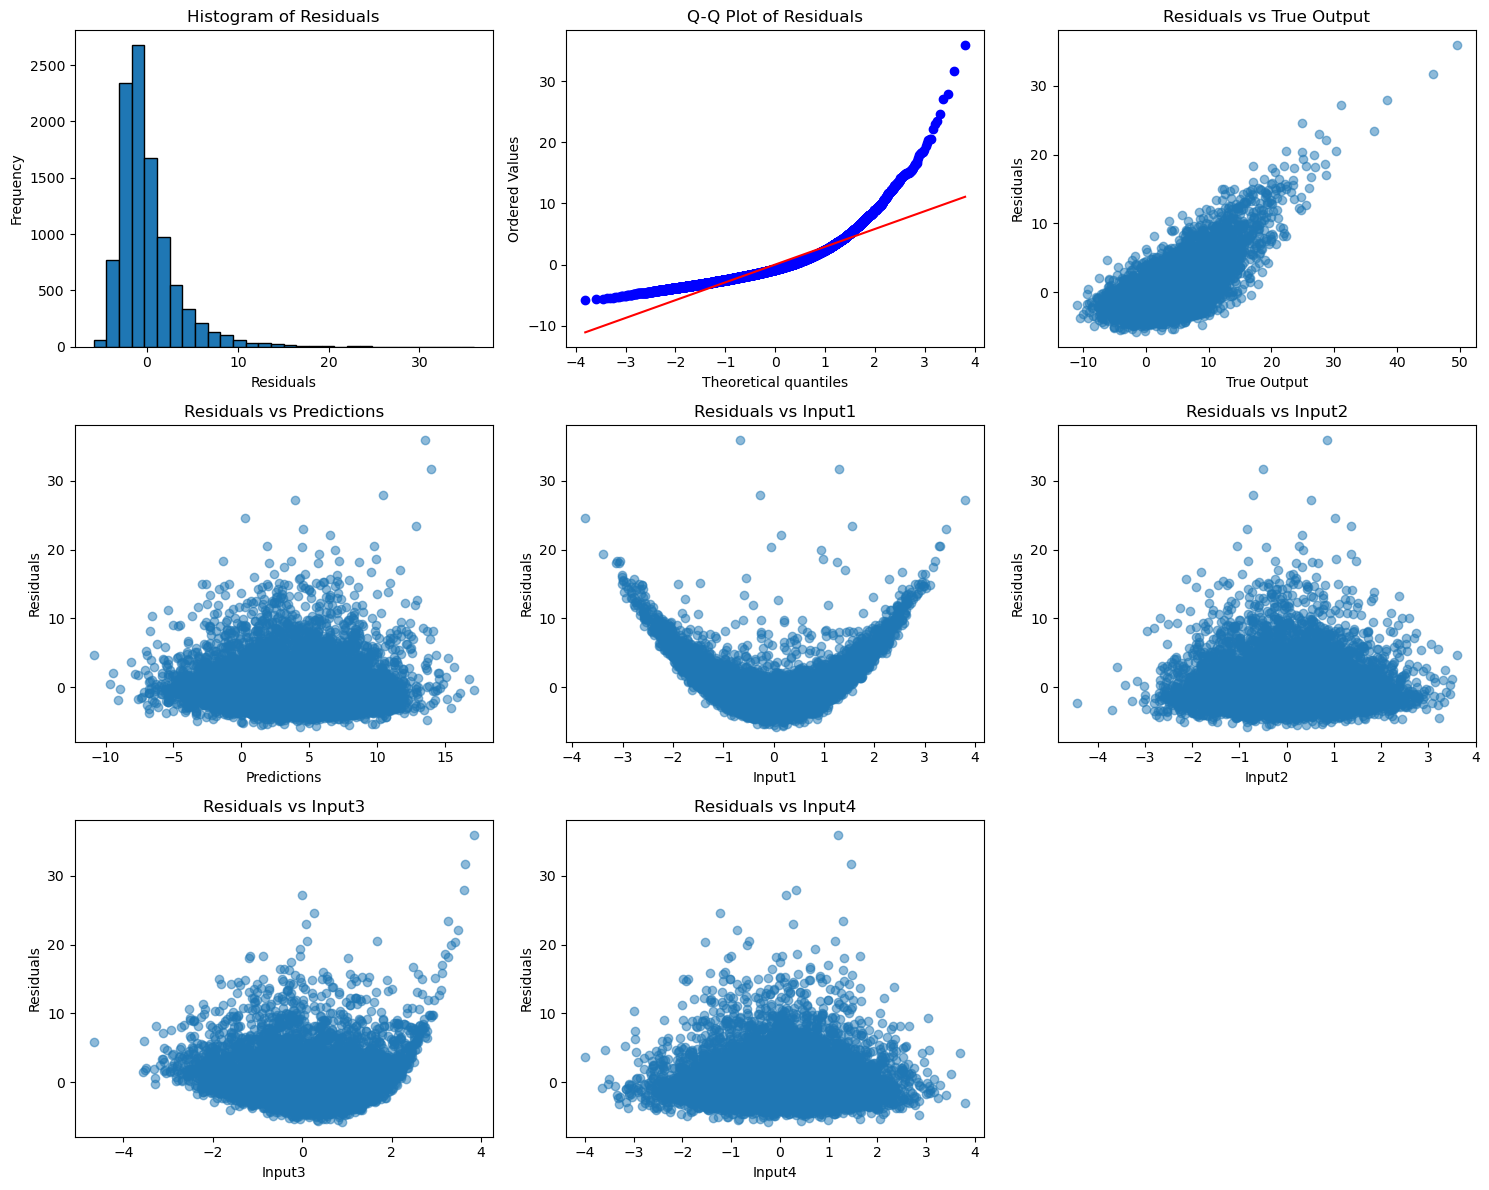

In [209]:
# TODO:  First, construct a dictionary of the coefficients to print them

coef_dict = {f"Input{i}":model.coefficients[i-1] for i in range(1,X.shape[1]+1)}
print(f"Coefficients of the model: {coef_dict}")

# Plot the residuals for the predictions
data["Predictions"] = model.predict(X)
plot_residuals(data, 'Output', 'Predictions')

**What are we seeing here? Is there any way to improve the model?**
> We see a non-linear pattern in the "Residuals vs Input1 plot" which could be cuadratic. We could take that into account to adjust the model.

As you may expect, you should see some higher-order contribution to the behavior of the data, since some of the residuals have clear structures. In particular, `Input1` has a higher-order polynomial contribution (*which order do you think?*), while `Input2` has an *exponential* form. 

In order to fit a regression model with these contributions, construct a new dataframe where each column corresponds to the desired manipulation of each variable. Then, fit the regression model and see the results.

* Also, pay attention to the fact that you can use whatever contribution you see fit here, not just these previous ones.

In [210]:
# 
data_transf = pd.DataFrame({'Input1': data["Input1"] ** 2,   # Substitute "None" by the degree you think works here
                            'Input2': np.exp(data["Input3"]),
                            'Input3': data["Input4"],
                            'Output': data["Output"]})
X_transf = data_transf.iloc[:,:3].values

# Train linear regression model
linreg = LinearRegressor()
linreg.fit(X_transf, y)

# Evaluate the metrics to see the behavior
y_pred = linreg.predict(X_transf)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': 0.9557524745534756, 'RMSE': 0.9962304737909358, 'MAE': 0.7956340344398113}


Now, print again the coefficients for the model and plot the residuals as you did before.

**What do you observe?**
> Now R2 is much better compared to the previous model

Coefficients of the model: {'Input1': 1.9985407741302785, 'Input2': 0.9951259300218527, 'Input3': 2.988069929362549}


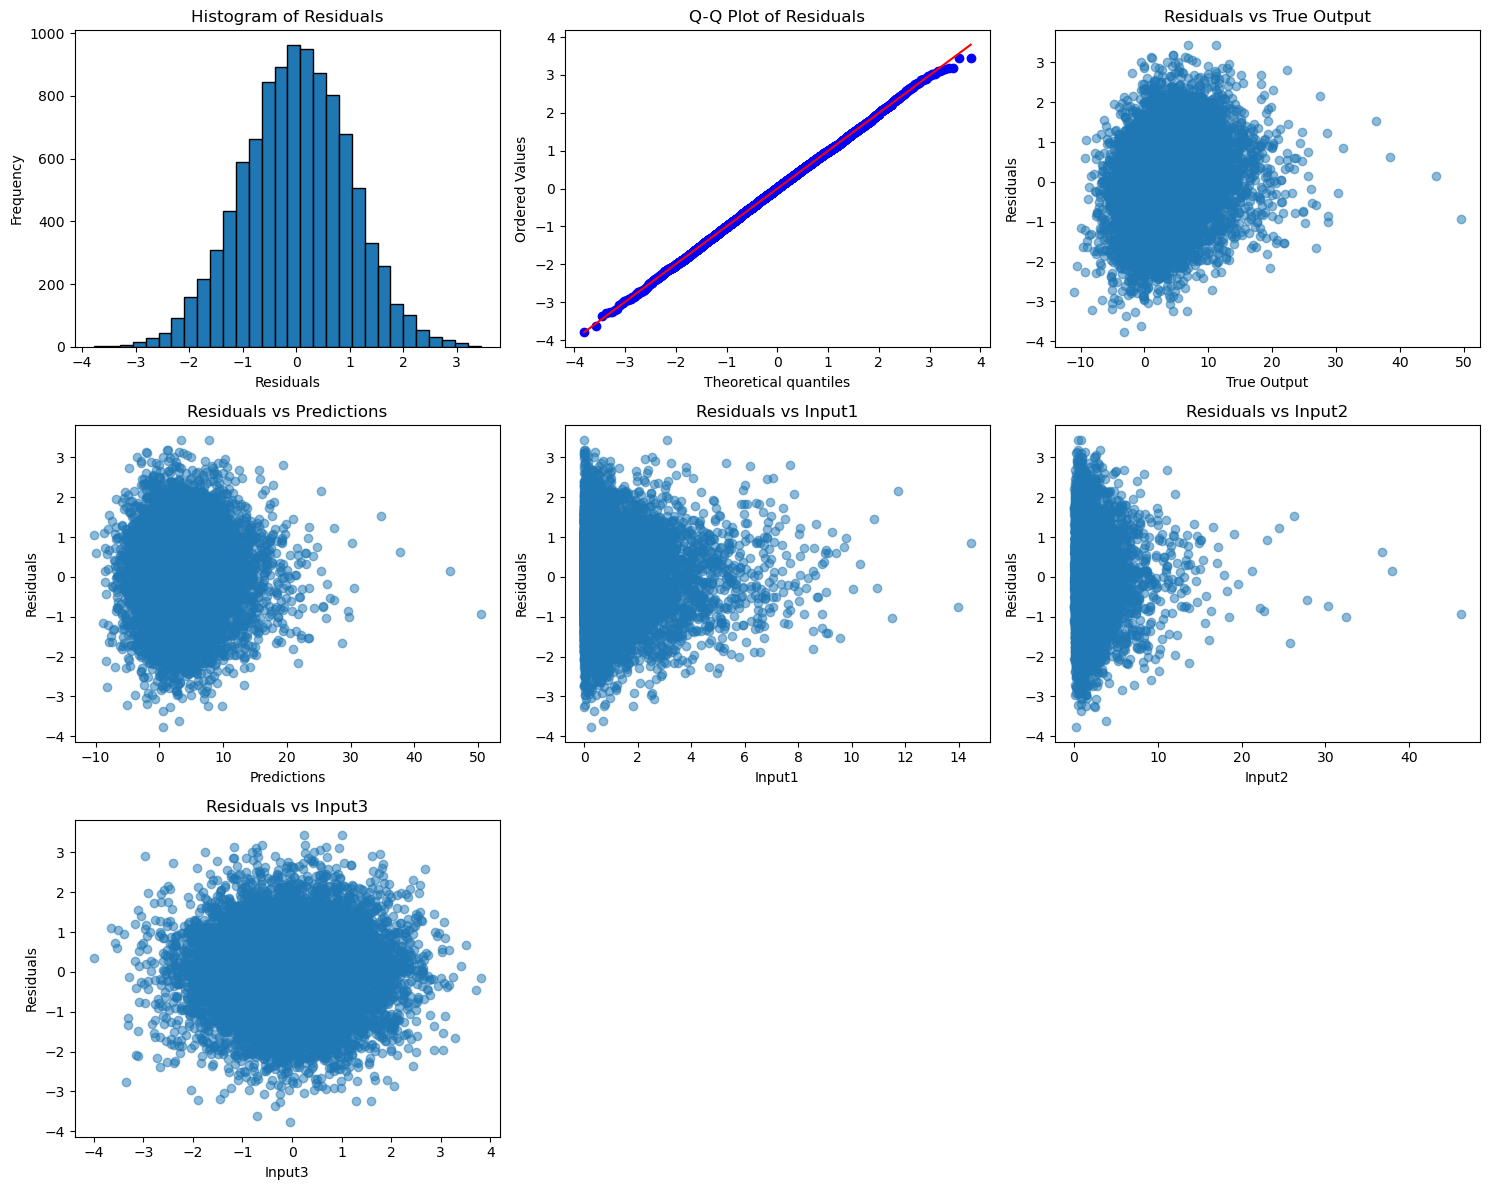

In [211]:
coef_dict = {'Input' + str(i+1): coef for i, coef in enumerate(linreg.coefficients)}
print(f"Coefficients of the model: {coef_dict}")
data_transf["Predictions"] = linreg.predict(X_transf)
plot_residuals(data_transf, 'Output', 'Predictions')

## Categorical variables

Linear regression, as is, can not deal with categorical variables. Therefore, we need to encode the variables when preprocessing the data. Complete the one-hot-encode function below. Take into account that strings shall be treated automatically as categorical variables.
<center>

![Image](https://miro.medium.com/v2/resize:fit:1358/1*ggtP4a5YaRx6l09KQaYOnw.png)

</center>

In [212]:
from src.Lab_2_4_LR2 import one_hot_encode


We will use this in a usual dataset from the internet. If everything is well, you should be able to run the following code as-is.

In [213]:
# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)


y = data['charges'].values
X = data.drop(columns=['charges']).values

# Preprocess the data
# Identify categorical columns for one-hot encoding
categorical_columns = [data.columns.get_loc(col) for col in ['sex', 'smoker', 'region']]

# One-hot encode categorical variables
X_encoded = one_hot_encode(X, categorical_columns, drop_first=True)
X_encoded = X_encoded.astype(float)                                  # Watch out for this!

# Instantiate and fit the LinearRegressor
model = LinearRegressor()
model.fit(X_encoded, y)

# Predict and evaluate
y_pred = model.predict(X_encoded)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)
print(model.coefficients,model.intercept)

{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163521}
[  256.85635254  -131.3143594    339.19345361   475.50054515
 23848.53454191  -352.96389942 -1035.02204939  -960.0509913 ] -11938.538576164736


Compare yourself with scikit

In [214]:
from sklearn.linear_model import LinearRegression

# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# Preprocess the data
# : One-hot encode categorical variables. Use pd.get_dummies()
data_encoded = pd.get_dummies(data) 

# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X)

# Evaluate the model
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)



{'R2': 0.7509130345985203, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163588}


### Colored residuals

Now that we have categorical variables, the relationship between inputs and outputs might differ for different levels of the categorical variables. Therefore, you will modify the `plot_residuals` function to **color the scatter plots based on the value of a specific categorical variable**.

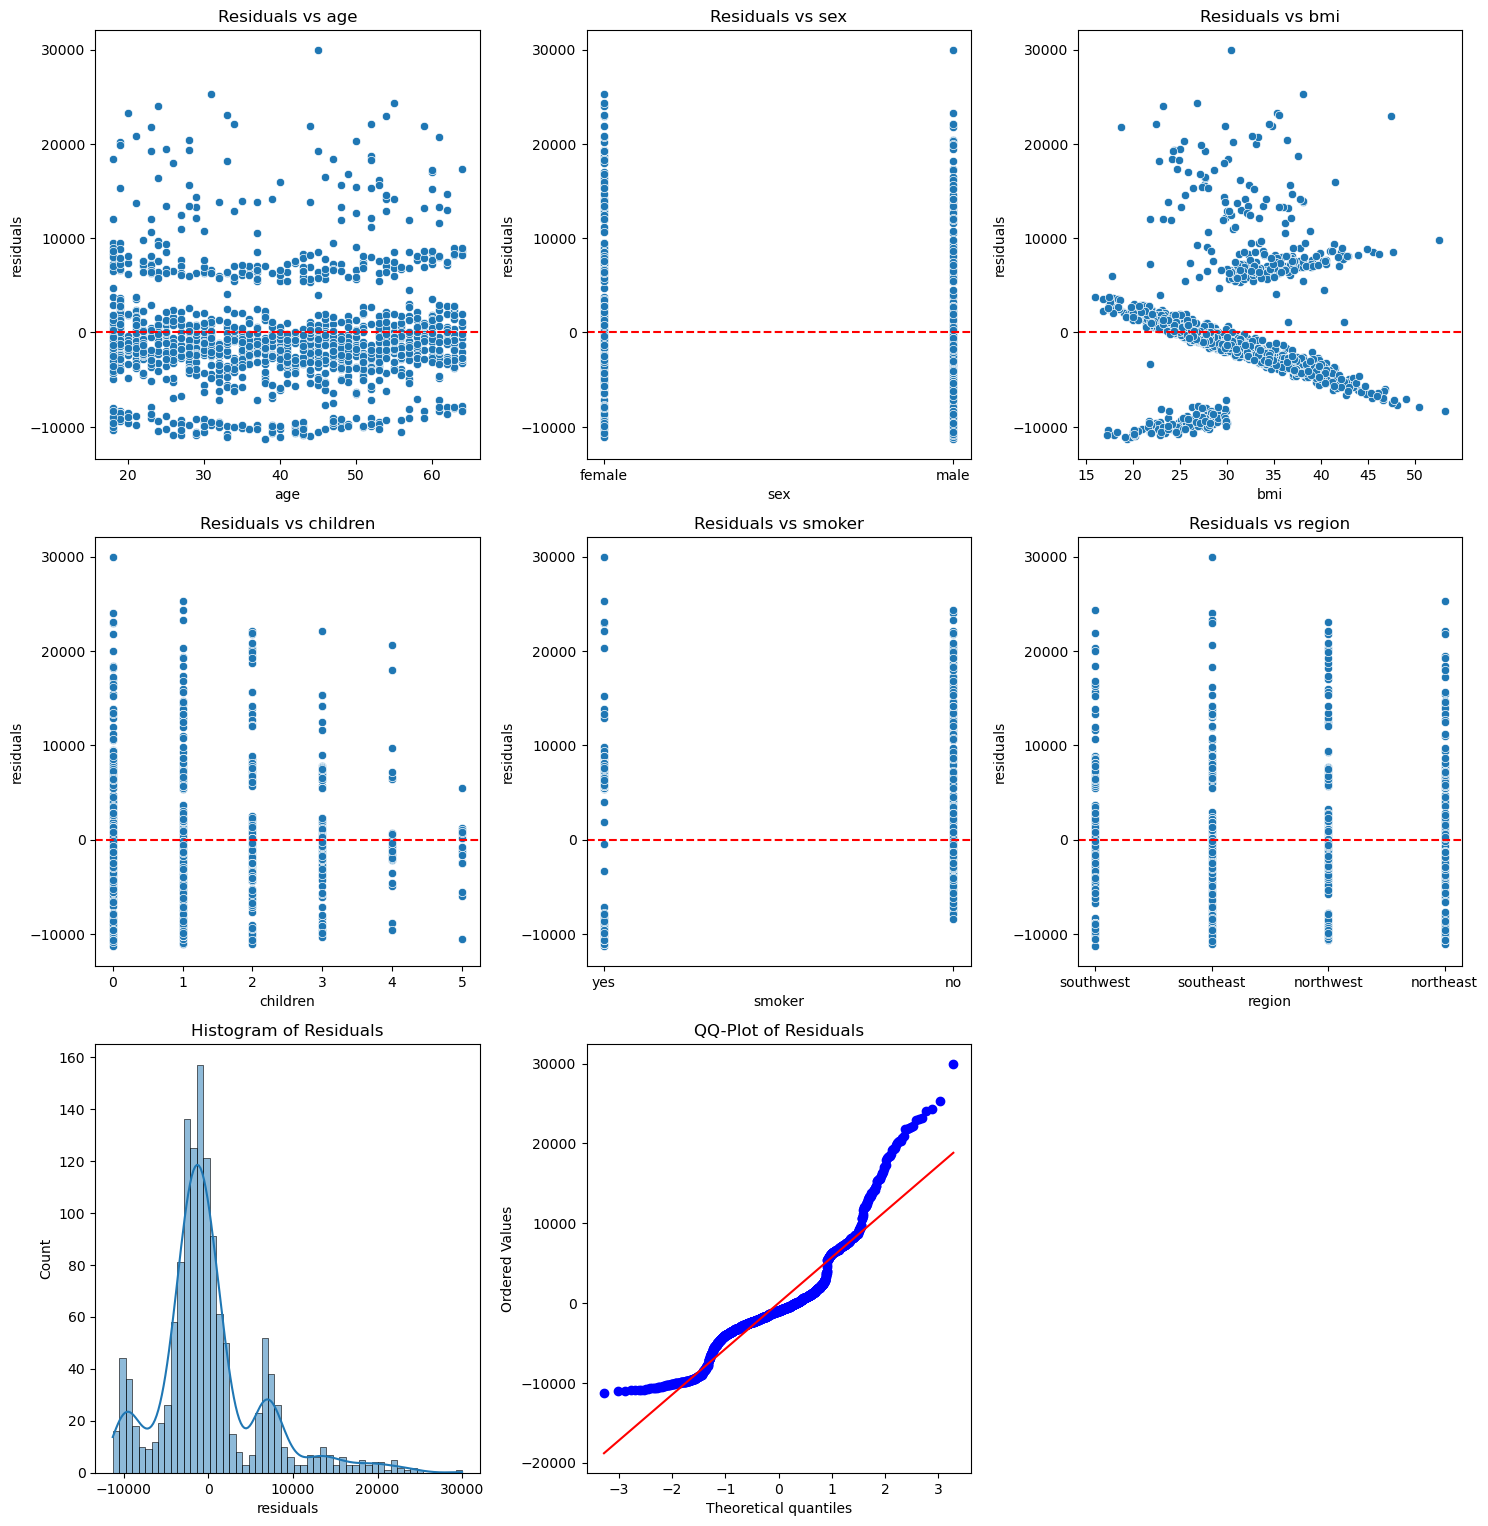

In [215]:
def plot_residuals(data, output_column, prediction_column, categorical_var=None):
    """
    Plot residuals of a model against all variables in the DataFrame. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
        categorical_var (str, optional): The name of a categorical variable for coloring. Defaults to None.
    """
    # : As before, calculate residuals
    data['residuals'] = data[output_column] - data[prediction_column]

    # Identify columns to plot (excluding the output and prediction columns)
    columns_to_plot = [col for col in data.columns if col not in [output_column, prediction_column, 'residuals']]

    # Number of rows and columns for the subplot
    n_cols = 3
    n_rows = int(len(columns_to_plot) / n_cols) + 2  # Additional row for histogram and QQ-plot

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    #: Plot each variable against the residuals
    for i, col in enumerate(columns_to_plot):
        ax = axes[i]
        
        if categorical_var and categorical_var in data.columns:
            sns.scatterplot(x=data[col], y = data['residuals'], data=data, ax=ax,hue = None)
        else:
            sns.scatterplot(x = data[col], y = data['residuals'], data=data, ax=ax)
        
        ax.set_title(f'Residuals vs {col}')
        ax.axhline(0, ls='--', color='r')

    # Histogram of residuals
    sns.histplot(data['residuals'], kde=True, ax=axes[i + 1])
    axes[i + 1].set_title('Histogram of Residuals')

    # QQ-plot of residuals
    stats.probplot(data['residuals'], dist="norm", plot=axes[i + 2])
    axes[i + 2].set_title('QQ-Plot of Residuals')

    # Hide any unused axes
    for j in range(i + 3, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

data['predictions'] = model.predict(X)
# Example usage
plot_residuals(data, 'charges', 'predictions', 'smoker')


**What's happening with the residuals?**
> The Q-Q plot ndicates that the resduals do not follow a normal distribution. The residuals vs bmi scatterplot may show a pattern that the model can't recreate.

# _Rolling in the deep_

Following the theory taught in class, do the following:

1. **implement the gradient descent algorithm** to train the linear regression model and reproduce the results using this training method. You can find the structure for the gradient descent inside the initial linear regression function, inside the method `fit_gradient_descent`.
2. As final steps, **display the progress of the loss function by plotting the gradient descent steps on the X-axis and the loss function on the Y-axis for each step**. 
3. Additionally, **using the same representation as in the previous section where each axis represents the values of w and b, show the sequence of steps that bring you closer to the optimum each time**. Each step should be a point in space, with coordinates (w,b). Compare all the results with the optimal solution from the scikit fit coefficients.

Feel free to add as many cells as you may need from here onwards in order to fulfill these three tasks

In [216]:
#Add to linear regressor class self.loss_history and self.history to keep track of the loss function and coefficients' values.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

class LinearRegressorGD:
    """
    Extended Linear Regression model with support for categorical variables and gradient descent fitting.
    """

    def __init__(self):
        self.coefficients = None
        self.intercept = None
        self.loss_history = [] #loss per epoch
        self.history = [] #coefficients and intercept pero epoch

    """
    This next "fit" function is a general function that either calls the *fit_multiple* code that
    you wrote last week, or calls a new method, called *fit_gradient_descent*, not implemented (yet)
    """

    def fit(self, X, y, method="least_squares", learning_rate=0.01, iterations=1000):
        """
        Fit the model using either normal equation or gradient descent.

        Args:
            X (np.ndarray): Independent variable data (2D array).
            y (np.ndarray): Dependent variable data (1D array).
            method (str): method to train linear regression coefficients.
                          It may be "least_squares" or "gradient_descent".
            learning_rate (float): Learning rate for gradient descent.
            iterations (int): Number of iterations for gradient descent.

        Returns:
            None: Modifies the model's coefficients and intercept in-place.
        """
        if method not in ["least_squares", "gradient_descent"]:
            raise ValueError(
                f"Method {method} not available for training linear regression."
            )
        if np.ndim(X) == 1:
            X = X.reshape(-1, 1)

        X_with_bias = np.insert(
            X, 0, 1, axis=1
        )  # Adding a column of ones for intercept

        if method == "least_squares":
            self.fit_multiple(X_with_bias, y)
        elif method == "gradient_descent":
            self.fit_gradient_descent(X_with_bias, y, learning_rate, iterations)

    def fit_multiple(self, X, y):
        """
        Fit the model using multiple linear regression (more than one independent variable).

        This method applies the matrix approach to calculate the coefficients for
        multiple linear regression.

        Args:
            X (np.ndarray): Independent variable data (2D array), with bias.
            y (np.ndarray): Dependent variable data (1D array).

        Returns:
            None: Modifies the model's coefficients and intercept in-place.
        """
        # Replace this code with the code you did in the previous laboratory session

        # Store the intercept and the coefficients of the model
        
        y_b = y.reshape(-1, 1)
        w = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(X),X)),np.transpose(X)),y_b)
        w = np.transpose(w)
        self.intercept = w[0][0]
        self.coefficients = w[0][1:]

    def fit_gradient_descent(self, X, y, learning_rate=0.01, iterations=1000):
        """
        Fit the model using either normal equation or gradient descent.

        Args:
            X (np.ndarray): Independent variable data (2D array), with bias.
            y (np.ndarray): Dependent variable data (1D array).
            learning_rate (float): Learning rate for gradient descent.
            iterations (int): Number of iterations for gradient descent.

        Returns:
            None: Modifies the model's coefficients and intercept in-place.
        """

        # Initialize the parameters to very small values (close to 0)
        m = len(y)
        self.coefficients = (
            np.random.rand(X.shape[1] - 1) * 0.01
        )  # Small random numbers
        self.intercept = np.random.rand() * 0.01

        # Implement gradient descent ()
        for epoch in range(iterations):
            predictions = self.predict(X[:,1:])
            error = predictions - y

            # : Write the gradient values and the updates for the paramenters
        
            gradient = (2/m) * np.matmul(np.transpose(X),error)
            
            self.intercept -= learning_rate*gradient[0]
            self.coefficients -= learning_rate*gradient[1:]

            #: Calculate and print the loss every 10 epochs
            if epoch % 1000 == 0:
                mse = np.mean(error**2)
                print(f"Epoch {epoch}: MSE = {mse}")
                new_coefs = self.coefficients - learning_rate*gradient[0]
                new_intercept = self.intercept - learning_rate*gradient[1:]
                self.loss_history.append(np.mean(error**2))
                self.history.append((new_coefs, new_intercept))

    def predict(self, X):
        """
        Predict the dependent variable values using the fitted model.

        Args:
            X (np.ndarray): Independent variable data (1D or 2D array).
            fit (bool): Flag to indicate if fit was done.

        Returns:
            np.ndarray: Predicted values of the dependent variable.

        Raises:
            ValueError: If the model is not yet fitted.
        """

        # Paste your code from last week

        if self.coefficients is None or self.intercept is None:
            raise ValueError("Model is not yet fitted")

        if np.ndim(X) == 1:
            #: Predict when X is only one variable
            predictions = self.coefficients * X + self.intercept
        else:
            # Predict when X is more than one variable
            predictions = np.matmul(X,self.coefficients)+ self.intercept
        return predictions




In [217]:
#Load the same dataset from before
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)


y = data['charges'].values
X = data.drop(columns=['charges']).values

# Preprocess the data
# Identify categorical columns for one-hot encoding
categorical_columns = [data.columns.get_loc(col) for col in ['sex', 'smoker', 'region']]

# One-hot encode categorical variables
X_encoded = one_hot_encode(X, categorical_columns, drop_first=True)
X_encoded = X_encoded.astype(float)                                  # Watch out for this!

# Instantiate and fit the LinearRegressor
model_gd = LinearRegressorGD()
model_gd.fit(X_encoded, y,method  = "gradient_descent",iterations=750000,learning_rate=0.0001)

# Comparación con scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X_encoded, y)




Epoch 0: MSE = 322633152.75248194
Epoch 1000: MSE = 124781653.53888676
Epoch 2000: MSE = 119318467.80462633
Epoch 3000: MSE = 114233838.47761776
Epoch 4000: MSE = 109491768.39839074
Epoch 5000: MSE = 105063440.38373318
Epoch 6000: MSE = 100924628.99545284
Epoch 7000: MSE = 97054222.57980108
Epoch 8000: MSE = 93433363.60713913
Epoch 9000: MSE = 90044934.56292652
Epoch 10000: MSE = 86873238.08043472
Epoch 11000: MSE = 83903787.28582509
Epoch 12000: MSE = 81123159.60843948
Epoch 13000: MSE = 78518887.97518401
Epoch 14000: MSE = 76079374.76949912
Epoch 15000: MSE = 73793820.29776846
Epoch 16000: MSE = 71652161.0429119
Epoch 17000: MSE = 69645014.95577821
Epoch 18000: MSE = 67763632.13747336
Epoch 19000: MSE = 65999849.88640115
Epoch 20000: MSE = 64346051.436701216
Epoch 21000: MSE = 62795127.91862846
Epoch 22000: MSE = 61340443.192007475
Epoch 23000: MSE = 59975801.27774365
Epoch 24000: MSE = 58695416.15972462
Epoch 25000: MSE = 57493883.76160528
Epoch 26000: MSE = 56366155.926216446
Epoch

LinearRegression()

In [218]:
# Gradient-descent vs Sklearn

y_pred_sklearn = model_sklearn.predict(X_encoded)
y_pred_GD = model_gd.predict(X_encoded)

ev_sklearn = evaluate_regression(y,y_pred_sklearn)
ev_GD = evaluate_regression(y,y_pred_GD)

print("Coefficients (GD vs. Scikit-Learn):", model_gd.coefficients, model_sklearn.coef_)
print("Intercept (GD vs. Scikit-Learn):", model_gd.intercept, model_sklearn.intercept_)
print(f"Evaluation metrics (GD vs. Scikit-Learn):{ev_GD} vs {ev_sklearn}")



Coefficients (GD vs. Scikit-Learn): [  255.95182518  -141.25793015   334.77332335   472.46308267
 23838.92451519  -388.84205365 -1049.58120153  -988.66625889] [  256.85635254  -131.3143594    339.19345361   475.50054515
 23848.53454191  -352.96389942 -1035.02204939  -960.0509913 ]
Intercept (GD vs. Scikit-Learn): -11731.991379167785 -11938.53857616715
Evaluation metrics (GD vs. Scikit-Learn):{'R2': 0.7509046705215168, 'RMSE': 6041.781086931133, 'MAE': 4165.535199403816} vs {'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163588}


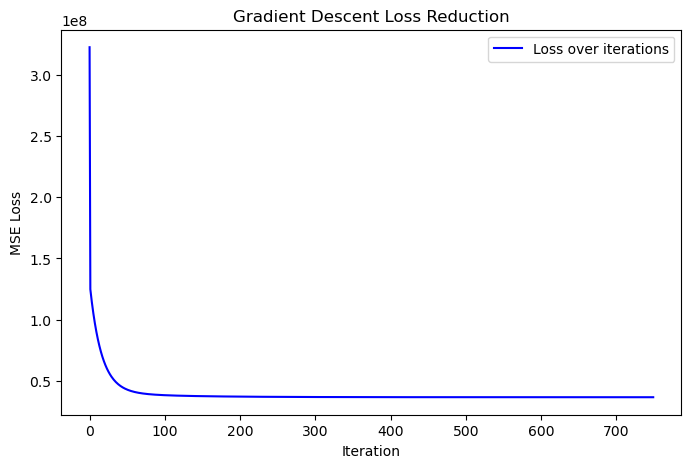

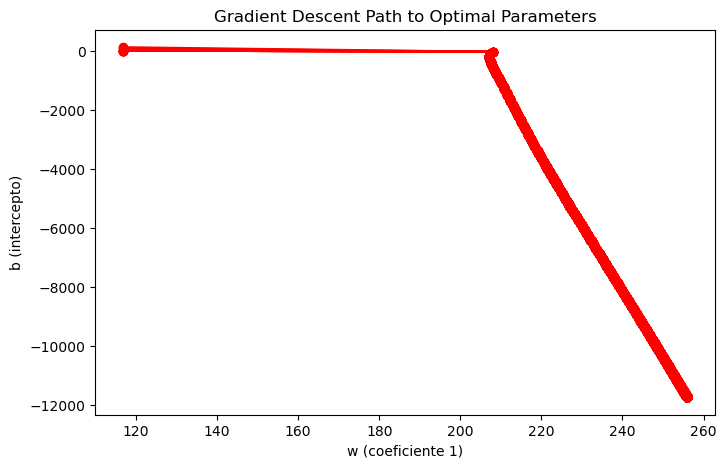

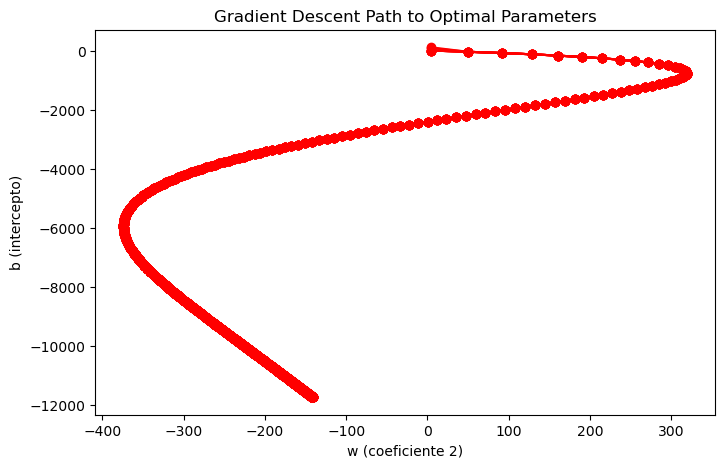

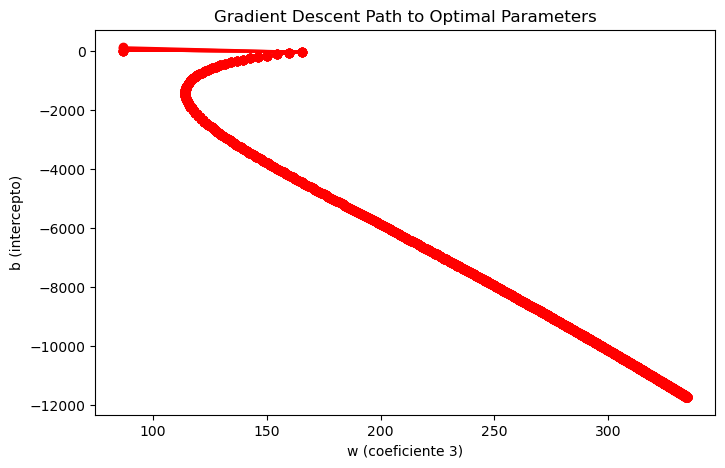

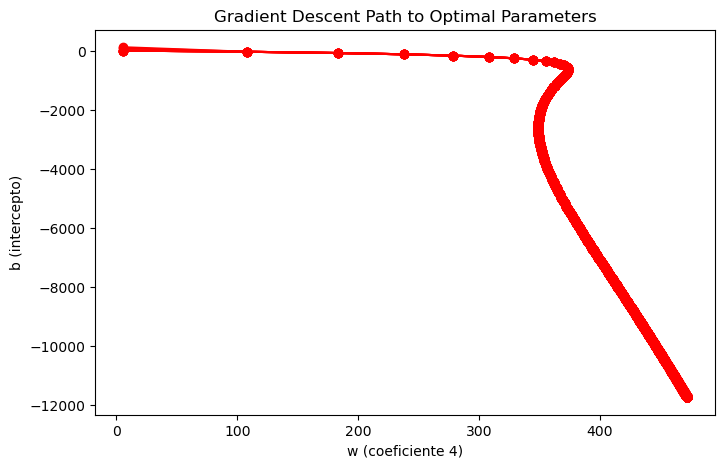

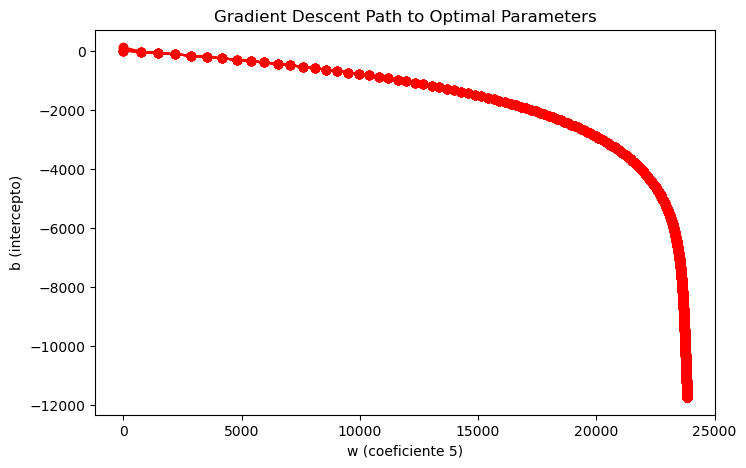

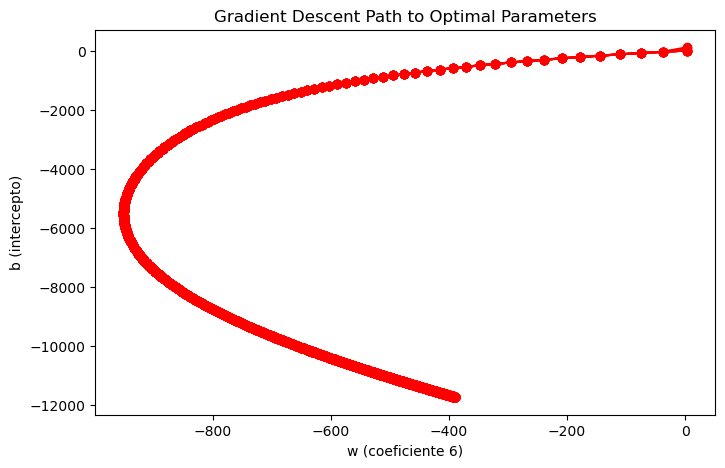

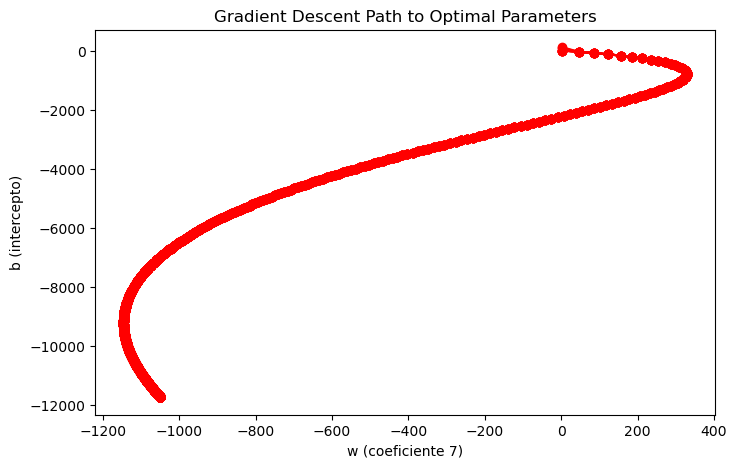

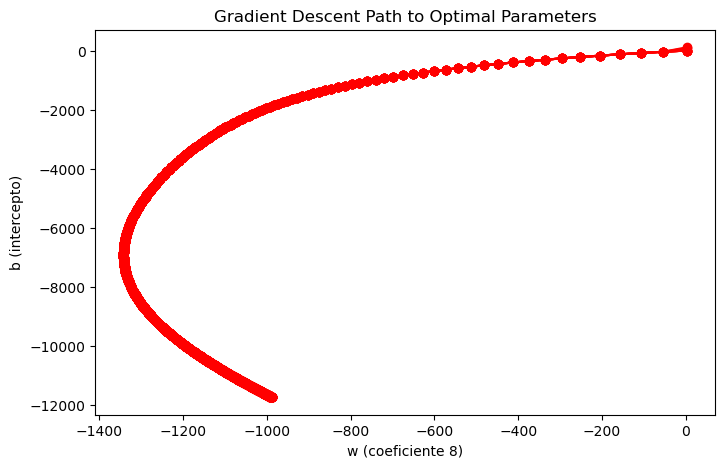

In [219]:
# Loss function graph
plt.figure(figsize=(8, 5))
plt.plot(model_gd.loss_history, label="Loss over iterations", color='b')
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Loss Reduction")
plt.legend()
plt.show()

# Coefficient/intercept graph
w_vals, b_vals = zip(*model_gd.history)
for i, w in enumerate(np.transpose(w_vals)):
    plt.figure(figsize=(8, 5))
    plt.plot(w, b_vals, marker='o', linestyle='-', color='r')
    plt.xlabel(f"w (coeficiente {i+1})")
    plt.ylabel("b (intercepto)")
    plt.title("Gradient Descent Path to Optimal Parameters")
    plt.show()
